#  <center>---------Math Problem Categorization community challenge--------</center>


<div style="text-width:100%;text-align:center;"><img align=middle src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRXJBmRtkQzaYNgn6L9SzUa6g6PdbVx8SEq4ZVJ08yuZg&usqp=CAU&ec=48665698" alt="Heat beating" style="height:300px;margin-top:3rem;"> </div>

**about** :The goal of this competition is to develop a machine-learning model that can accurately categorize math problems based on the text of the problem. This challenge is an excellent opportunity to apply and sharpen your text classification skills in a unique context, that of Mathematical problems.

Mathematics is a vast field with various sub-domains, each with its unique problem types and solving methods. While it's straightforward for humans, especially educators, to categorize math problems into their respective domains like algebra, calculus, statistics, etc., doing so automatically using machine learning can be a daunting task. However, such automated classification can make it easier for educators to curate problems and help students focus on specific math domains.


**Dataset**:

The dataset for this competition contains a collection of math problems in English, each labeled with their respective categories. The dataset has been anonymized and randomized to maintain the fairness of the competition. It is split into training and test sets. The training set contains the problems and their labels, while the test set only contains the problems.

Content of Dataset

the following files present in the dataset

 *  train.csv - the training set
 *  test.csv - the test set
 *  sample_submission.csv - a sample submission file in the correct format



# <center>---------------Importing libraries--------------</center>

In [1]:
import pandas as pd
import numpy as np
import os 
import warnings
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

2023-06-22 17:05:12.505869: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 17:05:12.961955: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-22 17:05:12.961976: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-22 17:05:14.245548: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# **<center>------------Importing Files of Dataset------------</center>**

In [2]:
# Input data files are available in the read-only "../Shivam_Singh/Downloads/" directory

for dirname, _, filenames in os.walk('/home/shivam_singh/Downloads/math-problem-categorization'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/home/shivam_singh/Downloads/math-problem-categorization/test.csv
/home/shivam_singh/Downloads/math-problem-categorization/sample_submission.csv
/home/shivam_singh/Downloads/math-problem-categorization/train.csv


In [3]:
df=pd.read_csv('//home/shivam_singh/Downloads/math-problem-categorization/train.csv') # reading train.csv file

# **<center>--------------Data Preprocessing----------------</center>**

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   problem   250 non-null    object
 1   category  250 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


(250, 2)

**interpret**: shape of the dataframe is (250,2) Hence it consist 250 rows and 2 column [category,problem]
* problem feature: It consist of text data which are questions related to such as alegbra and system of equation  etc.
* category feature: It consist of numeric categorical labeling for  each problem feature where it belongs to which domain of alegbra 


In [5]:
df.head()# first 5 enteries

,problem,category
0,"At a ring toss game at a carnival, Marco throw...",19
1,What is `471 ÷ 100`? Interactive: Students fol...,22
2,Follow the directions below to create an equiv...,20
3,Solve the following system by substitution:\n`...,14
4,Solve the following system by substitution:\n`...,14


In [6]:
df.sample(4) # random 4 samples from file

,problem,category
190,Estimate the product:\n`4.3 × 6.1`,23
124,"Write an expression to match the phrase:""`2` a...",1
34,Estimate the product:\n`6.9 × 5.2`,23
13,"In her piggy bank, Brigitta has `6` nickels an...",8


**Data Cleaning**:In this step we try to handle missing values, outliers, and inconsistencies in the dataset. Missing values can be imputed or removed based on the analysis of the dataset

In [7]:
df.isnull().sum()

problem     0
category    0
dtype: int64

**interpret**: train file doesn't contain any missing values.

In [8]:
df.describe()

,category
count,250.000000
mean,11.620000
std,7.158812
min,0.000000
25%,6.000000
50%,11.000000
75%,17.750000
max,24.000000


**Interpret**: Total counts in category label are 250
* minimum value present 0
* maxium value present 24
* mean value is 11.62

In [9]:
df['category'].value_counts()

7     19
16    11
0     10
22    10
4     10
11    10
3     10
2     10
6     10
12    10
5     10
13    10
9     10
15    10
1     10
23    10
8     10
24    10
14    10
17     9
19     9
18     8
10     8
20     8
21     8
Name: category, dtype: int64

In [10]:
df['problem'].value_counts()

At a ring toss game at a carnival, Marco throws `8` rings. Some of the rings are worth `5` points, and some are worth `10` points. Marco scores a total of `70` points. How many `5`-point rings and `10`-point rings did Marco toss?                                                                                                                                                                                                           1
Write an algebraic expression to match the phrase below.\n"`8` multiplied by `5` less than `y`"                                                                                                                                                                                                                                                                                                                                                 1
Solve the following system by substitution:\n`y = 9x - 12`\n`y = 3x`                                                                

In [11]:
df['problem'].duplicated().value_counts()

False    250
Name: problem, dtype: int64

In [12]:
df['problem'].nunique()

250

**Interpret**: There is no duplicates among problem feature

In [13]:
df['category'].value_counts().index

Int64Index([ 7, 16,  0, 22,  4, 11,  3,  2,  6, 12,  5, 13,  9, 15,  1, 23,  8,
            24, 14, 17, 19, 18, 10, 20, 21],
           dtype='int64')

<Figure size 2000x1200 with 0 Axes>

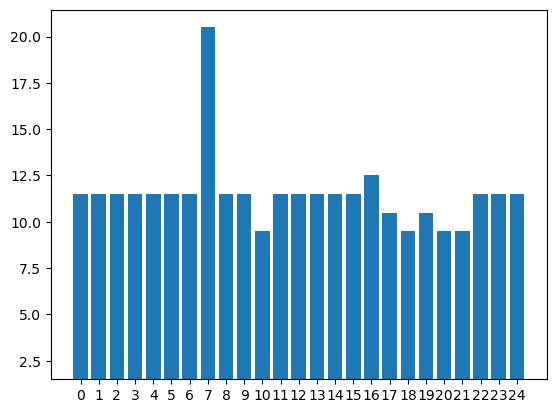

<Figure size 2000x1200 with 0 Axes>

In [14]:
plt.bar(df['category'].value_counts().index,df['category'].value_counts(),bottom=1.5,tick_label=df['category'].value_counts().index)
plt.figure(figsize=(20,12))

**Data balancing**: our dataset is balanced with goood parameter

In [15]:
df[df['category']==7]

,problem,category
31,A housepainter bought `16` gallons of paint. T...,7
41,The temperature in Springfield was `58` degree...,7
53,Follow the directions below to create an equiv...,7
73,Kendra watched `e` episodes of anime over the ...,7
81,Franco went for a long run on Sunday that was ...,7
89,All of the `8`th graders are taking an end-of-...,7
93,The Gonzalez family drove `h` hours to get to ...,7
127,Follow the directions below to create an equiv...,7
140,Salma has previously visited `s` states. She v...,7
185,Franklin Middle School is having a canned food...,7


# **<center>------------------Text Data Preprocessing-------------------</center>**
This is most important step  in any NLP related task and steps involved are
* Using regular expression for removing the numbers.
* Lowering the case for all alphabets present in problem feature
* Tokenise the words present in each problem using NLTK
* Using list of words  customising it with adding '$'and removing these words from every tokenise words because they are lot of much

In [58]:
def text_preprocessing(text):
    #removing punctuations
    text=text.translate(str.maketrans('','',string.punctuation))
    
    #lower the case
    text=text.lower()
    
    #remove numbers
    text=re.sub('\d+','',text)
    #pattern='[^a-zA-z\s]'
    #sent =re.sub(pattern,'',text)
    
    #remove stopwords and '$' 
   # nltk.download('stopwords')
    """
    from nltk.corpus import stopwords
    stop_word_list=set(stopwords.words('english')+['$'])
    #tokenisation
    words=nltk.word_tokenize(text)
    #sents=nltk.word_tokenize(sent)
    words=[word for word in words if word not in stop_word_list]
    """
    #Lemmatize words
    """
    lemmatizer = WordNetLemmatizer()
    words_cleard = [lemmatizer.lemmatize(word) for word in sents if word not in stop_word_list]"""
    
    # join text
    #text=' '.join(words)
    
    return text

In [21]:
dff=df

In [1]:
#nltk.download('punkt')
#nltk.download('stopwords')

I tried with nltk.download('stopword') or different methods to install stopwords but it seems there is error , this code is working fine in kaggle notebook but maybe or maybe not it will not displaying full context of code 
( i know this might be seems as limitation mine but trust i will later try to fix thi os issue)

In [56]:
'''import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
'''

[nltk_data] Error loading stopwords: <urlopen error [Errno 110]
[nltk_data]     Connection timed out>


False

In [ ]:
#nltk.download('stopwords')

In [28]:
#!python -m nltk.downloader stopwords -yes

/home/shivam_singh/anaconda3/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
Usage: downloader.py [options]

downloader.py: error: no such option: -y


In [59]:
dff['problem']=dff['problem'].apply(text_preprocessing)

**In this step , we split data in train and test with stratified sampling approach to divide data in small group as per category feature**


In [60]:
X_train, X_test, y_train, y_test = train_test_split(dff['problem'], dff['category'], test_size=0.298,stratify=dff['category'], random_state=42)

In [61]:
print("length of train data",len(X_train),","
      ,"length of test data",len(X_test))

print(len(y_train),y_train.shape)
print(len(y_test),y_test.shape)

length of train data 175 , length of test data 75
175 (175,)
75 (75,)


#  **This is the most important step in text data preprocessing**
computer do not understand text data so we need to represent text data in form of numbers so that computer can make use of them
* we use two techniques bag of words and TFIDF(Term Frequency Inverse Document frequency)


In [62]:
# join train data as list of text
text_corpus=list(''.join(word) for word in X_train)

In [63]:
# join test data as list of words
test_text_corpus=list(''.join(word) for word in X_test)

**Bag of Words**

x_train_bag and y_train are dataset contain information which will be used in model building 

In [64]:
cv=CountVectorizer()
x_train_bag=cv.fit_transform(text_corpus)

**TFIDF**
* x_train_vactorised and y_train are dataset contain information which will be used in model building

In [65]:
c=TfidfVectorizer()
f=X_train_vactorised=c.fit_transform(text_corpus)

In [66]:
f.shape

(175, 635)

In [67]:
v=X_test_vactorised=c.transform(test_text_corpus)
print(v.shape)

(75, 635)


 # **<center>------------Text Data Preprocessing Ends here------------------</center>**

# Model Building ,Training,Testing and Tunning 
* I used GridSearch for hyperparamter tunning and K-fold cross validation for accurate results both implemented with Sciki-Learn's
  GridSearch.
* Built SVM, RandomForest, decision Tree, xgboost multi categorical classification models 


# SVM classifier using Data Augmentation with SMOTE

In [68]:

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto',k_neighbors=4)

# Apply SMOTE to the training data
X_train_augmented, y_train_augmented = smote.fit_resample(X_train_vactorised, y_train)

# Verify the new shape of the augmented data
print("Augmented training data shape:", X_train_augmented.shape)
print("Augmented training labels shape:", y_train_augmented.shape)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6261d2e700>
Traceback (most recent call last):
  File "/home/shivam_singh/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/shivam_singh/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/shivam_singh/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/shivam_singh/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_i

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6246bc8940>
Traceback (most recent call last):
  File "/home/shivam_singh/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/shivam_singh/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/shivam_singh/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/shivam_singh/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_i

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6246bc8940>
Traceback (most recent call last):
  File "/home/shivam_singh/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/shivam_singh/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/shivam_singh/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/shivam_singh/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_i

Augmented training data shape: (325, 635)
Augmented training labels shape: (325,)


In [74]:
# Train a Support Vector Machine (SVM) classifier on the training data
SVMclassifier = SVC(kernel='linear', C=1, random_state=42)
SVMclassifier.fit(X_train_augmented, y_train_augmented)

# Predict the categories of the testing data using the trained classifier
SVMy_pred = SVMclassifier.predict(X_test_vactorised)

# Evaluate the performance of the classifier using the classification report
accuracy_svm = accuracy_score(y_test, SVMy_pred)
print("accuracy of svm model",accuracy_svm)



accuracy of svm model 0.76


 **-------------RandomForest classifier using Data Augmentation by SMOTE Over-Sampling-----------------------------**
 * hyper perameter such as 'n_estimators','max_depth','min_samples_split' selected using GridSearch for accurate results  implemented with sklearn

In [76]:
param_grid={'n_estimators':[100,200,300],
           'max_depth':[None,5,10],
           'min_samples_split':[2,5,10]}
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#Creating the random forest classiifer model
model=RandomForestClassifier(random_state=42)
grid_search=GridSearchCV(model,param_grid, cv=5)
grid_search.fit(X_train_augmented, y_train_augmented)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [77]:
best_params=grid_search.best_params_
best_model=grid_search.best_estimator_
best_model.fit(X_train_augmented,y_train_augmented)

val_predictions=best_model.predict(X_test_vactorised)
accuracy_rm=accuracy_score(y_test, val_predictions)
print("accuracy of RandomForest model",accuracy_rm)

accuracy of RandomForest model 0.8133333333333334


# **<center>--------------DecisionTree with Bagging ensemble and AdaBoots ensemble methods----------</center>**

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Create a base decision tree classifier
base_classifier = DecisionTreeClassifier()

# Bagging ensemble method
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train_augmented, y_train_augmented)
bagging_predictions = bagging_classifier.predict(X_test_vactorised)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print("Bagging Accuracy:", bagging_accuracy)

# AdaBoost ensemble method
adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)
adaboost_classifier.fit(X_train_augmented, y_train_augmented)
adaboost_predictions = adaboost_classifier.predict(X_test_vactorised)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Accuracy:", adaboost_accuracy)


Bagging Accuracy: 0.7866666666666666
AdaBoost Accuracy: 0.72


**In this step we best tunned hyperperameters  were used and displayed, this tunned model gives the best accuracy**

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of decision trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)
grid_search.fit(X_train_augmented, y_train_augmented)

# Get the best model and its performance
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_vactorised)
accuracy = accuracy_score(y_test, predictions)
print("Best Random Forest Accuracy:", accuracy)
print("Best Random Forest Parameters:", grid_search.best_params_)

Best Random Forest Accuracy: 0.8133333333333334
Best Random Forest Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [137]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define the base classifiers
#rf_classifier = RandomForestClassifier()
xgb_classifier = XGBClassifier()
lgb_classifier = LGBMClassifier()

# Define the ensemble classifier using majority voting
ensemble_classifier = VotingClassifier(estimators=[('xgb', xgb_classifier), ('lgb', lgb_classifier)], voting='soft')
*
accuracy = ensemble_classifier.score(X_test_vactorised, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7733333333333333


# Conclusion

As the dataset was highly balanced but limited data features to further train models we used Data Augmentation by SMOTE Over-sampling methods and this over sampling result in good accuracy for assesing the model(in case of imbalanced dataset f1 score would be prefered

the model with highest accuracy is :**Random Forest with TFIDF ,Data Augmentation and for tunning hyperperameters GridSearch methode is used(81.3334% accuracy)** 

# Future area of research which can be done with more time and computational power
* Building an lstm Model
* Building most widely used in field of NLP these days that is BERT which is uses Transformer and run on attention mechanism
* Using word 2 vec for word embedding which is better then bag of words and TFIDF
* using PCA to reduce dimensions,visulize and use it with KNN model which suffer from Curse of dimensionalty

**-----------thank you waiting eagerly to get feedback------------**